# Project Planning Stage (Group)

## **Introduction**

Background Recruiting and retaining active users is critical for running online gaming experiments. The UBC Minecraft research server, led by Prof. Frank Wood, offers an open-access environment in which every movement and click are automatically logged. While the server generates rich behavioural data, only a small fraction of players eventually subscribe to the project’s game-related newsletter—a low-cost channel for announcing new experiments, updates, and funding opportunities. Being able to predict subscription likelihood from readily available player attributes would allow the team to focus recruitment messages on users most likely to engage, thereby increasing subscription rates without expanding marketing effort.

Primary Question Can a player’s experience level, playing time, and age predict whether a player subscribes to the game-related newsletter? Datasets One CSV file is provided and is linkable via the primary key player_id.

players.csv – one row per unique participant. After importing, the merged file contains 1,842 players. The data is collected between 2024-08-01 and 2024-11-30.

*Edited intro if you want to change it*

Recruiting and retaining active users is critical for running online gaming experiments. The UBC Minecraft research server logs all player activity in detail. However, only a small fraction of players subscribe to the game-related newsletter. Because the newsletter is used to announce experiments, updates, and funding opportunities, understanding what influences subscription behavior can help the team target their messages in a more effective way.

For this project, our goal is to explore the question:
*"Can a player's experience level, playing time, and age predict whether a player subscribes to the game-related newsletter?"*

We will be using the players.csv dataset that contains one row per user and other information like experience level, total hours played, age, and subscription status. The data is collected between 2024-08-01 and 2024-11-30.


**Describe why we used said predictors and why we didn't use other predictors**

**Descriptive summary of dataset:**
- The players dataset contains 196 observations and 7 variables.

  Below is a summary of the variables used in our analysis:

| Variable Name | Data Type   | Description / Meaning                                                                                       | Notes / Potential Issues                                                                                |
| ------------- | ----------- | ----------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| Experience    | Categorical | Player’s self-reported experience level (Beginner, Amateur, Regular, Veteran, Pro)                          | Reflects player skill/familiarity                                                                       |
| Subscribe     | Logical     | Whether players are subscribed to the newsletter (TRUE/FALSE)                                               | May be influenced by external sources other than gameplay experience (marketing, interest)              |
| hashedEmail   | Categorical | Unique hashed player identifier (anonymized)                                                                | Used to identify players; no direct analytical value                                                    |
| played_hours  | Numeric     | Total hours played on server                                                                                | Includes 0 hours (inactive or new players); possible outliers with high values                          |
| name          | Categorical | Player’s first name                                                                                         | Nominal data with potential duplicates                                                                  |
| gender        | Categorical | Player’s self-identified gender (Male, Female, Non-binary, Two-Spirited, Agender, Other, Prefer not to say) | Multiple categories with social diversity; minority groups may require special attention/representation |
| age           | Integer     | Player’s age in years                                                                                       | Large range of ages; two missing data points                                                            |

- Summary statistics table for numeric/integer variables:
  | Variable     | Min  | Mean  | Median | Max   | Std Dev |
| ------------ | ---- | ----- | ------ | ----- | ------- |
| played_hours | 0.00 | 5.85  | 0.1   | 223.10 | 28.36   |
| age          | 9.00 | 21.14 | 19.00  | 58.00 | 7.39    |

## **Methods and Results**

Below, we created a cleaned version of the dataset by selecting some of the previously mentioned variables and removing rows with missing values.

In [16]:
install.packages("tidyverse")

library(tidyverse)
library(knitr)
library(GGally)
library(ggplot2)
library(dplyr)
library(tidymodels)
library(tidyclust)
library(themis)
library(janitor)
library(rsample)
library(repr)
options(repr.matrix.max.rows = 6)
     

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages


Attaching package: ‘tidyclust’


The following objects are masked from ‘package:parsnip’:

    knit_engine_docs, list_md_problems



Attaching package: ‘janitor’


The follo

In [2]:
players <- read_csv("players.csv")

head(players)
glimpse(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [3]:
#Summary Statistics

players_summary <- players |>
  summarise(
    across(where(is.numeric),
           list(min = ~round(min(., na.rm = TRUE), 2),
                mean = ~round(mean(., na.rm = TRUE), 2),
                median = ~round(median(., na.rm = TRUE), 2),
                max = ~round(max(., na.rm = TRUE), 2),
                sd = ~round(sd(., na.rm = TRUE), 2)))
  )
players_summary


played_hours_min,played_hours_mean,played_hours_median,played_hours_max,played_hours_sd,Age_min,Age_mean,Age_median,Age_max,Age_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,5.85,0.1,223.1,28.36,9,21.14,19,58,7.39


In [4]:
#selecting necessary variables

players_select <- players |>
    select(subscribe, experience, played_hours, Age)

#converting categorical variables to factors

players_select <- players_select |>
    mutate(subscribe = as.factor(subscribe), experience = as.factor(experience))

#removing rows with missing vals

players_clean <- players_select |>
    filter(!is.na(played_hours), !is.na(Age))

#mean values for numeric variables

mean_summary <- players_clean |>
    summarise(mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE)) |>
    mutate(across(everything(), ~round(.x, 2)))

head(players_clean)
mean_summary

subscribe,experience,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,Pro,30.3,9
TRUE,Veteran,3.8,17
FALSE,Veteran,0.0,17
TRUE,Amateur,0.7,21
TRUE,Regular,0.1,21
TRUE,Amateur,0.0,17


mean_played_hours,mean_age
<dbl>,<dbl>
5.9,21.14


## **Data Visualization**

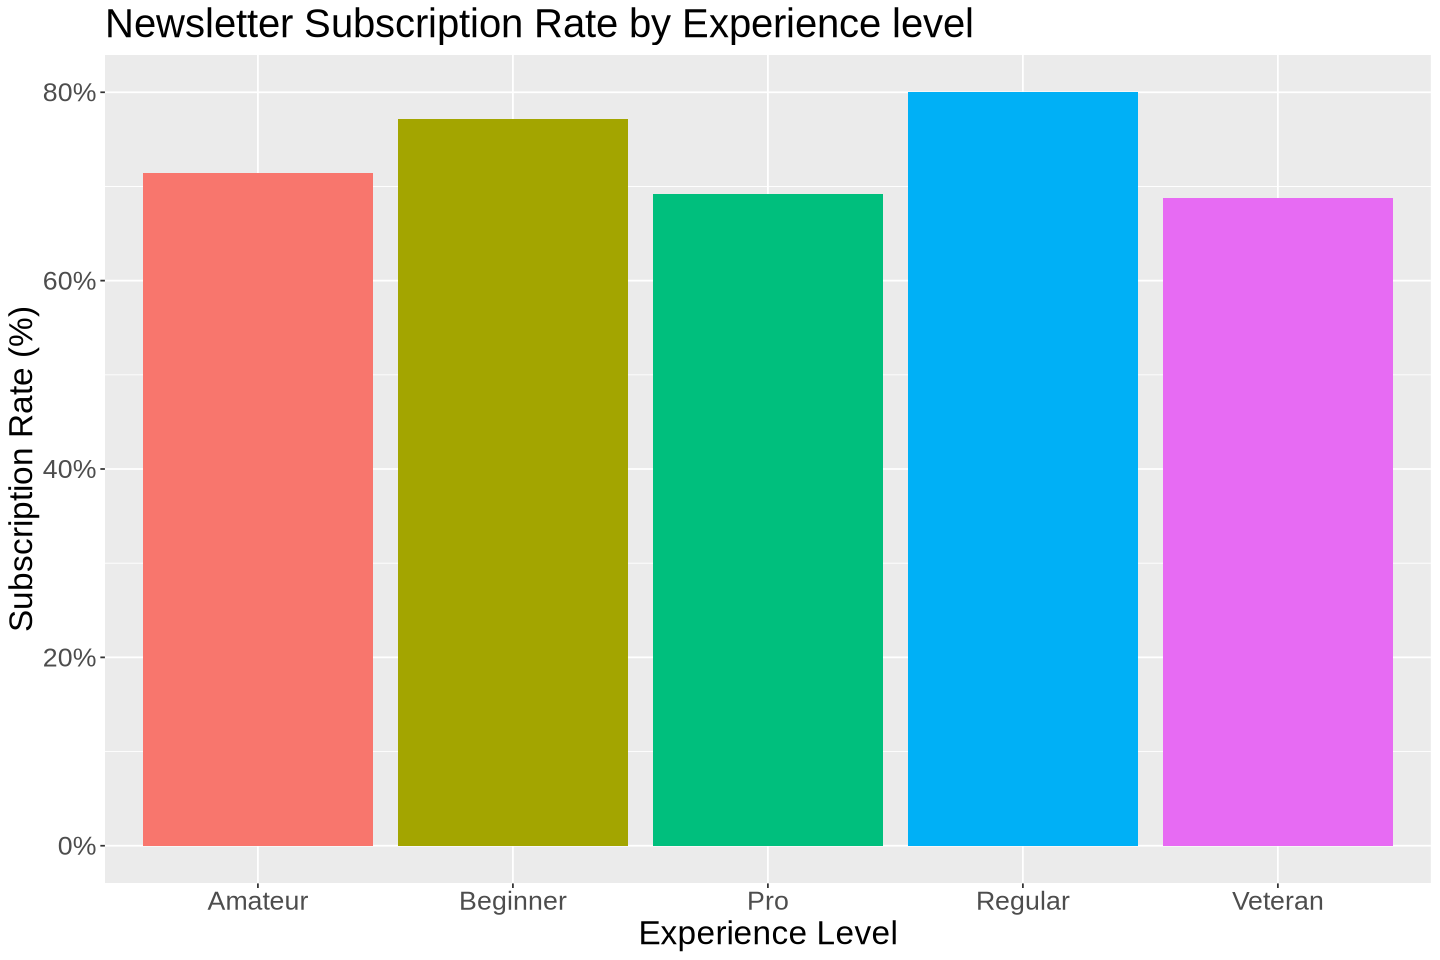

In [5]:
#Plot 1: Categorical Plot - Experience vs. Subscription Status
options(repr.plot.width = 12, repr.plot.height = 8)

cat_plot <- players_clean |>
    group_by(experience, subscribe) |>
    summarise(count = n(), .groups = "drop") |>
    group_by(experience) |>
    mutate(prop = count / sum(count)) |>
    filter(subscribe == "TRUE") |>
    ggplot(aes(x = experience, y = prop, fill = experience)) +
    scale_y_continuous(labels = scales::percent_format()) +
    geom_col(show.legend = FALSE) + 
    labs(title = "Newsletter Subscription Rate by Experience level", x = "Experience Level", y = "Subscription Rate (%)") + 
    theme(text = element_text(size = 20)) 
cat_plot

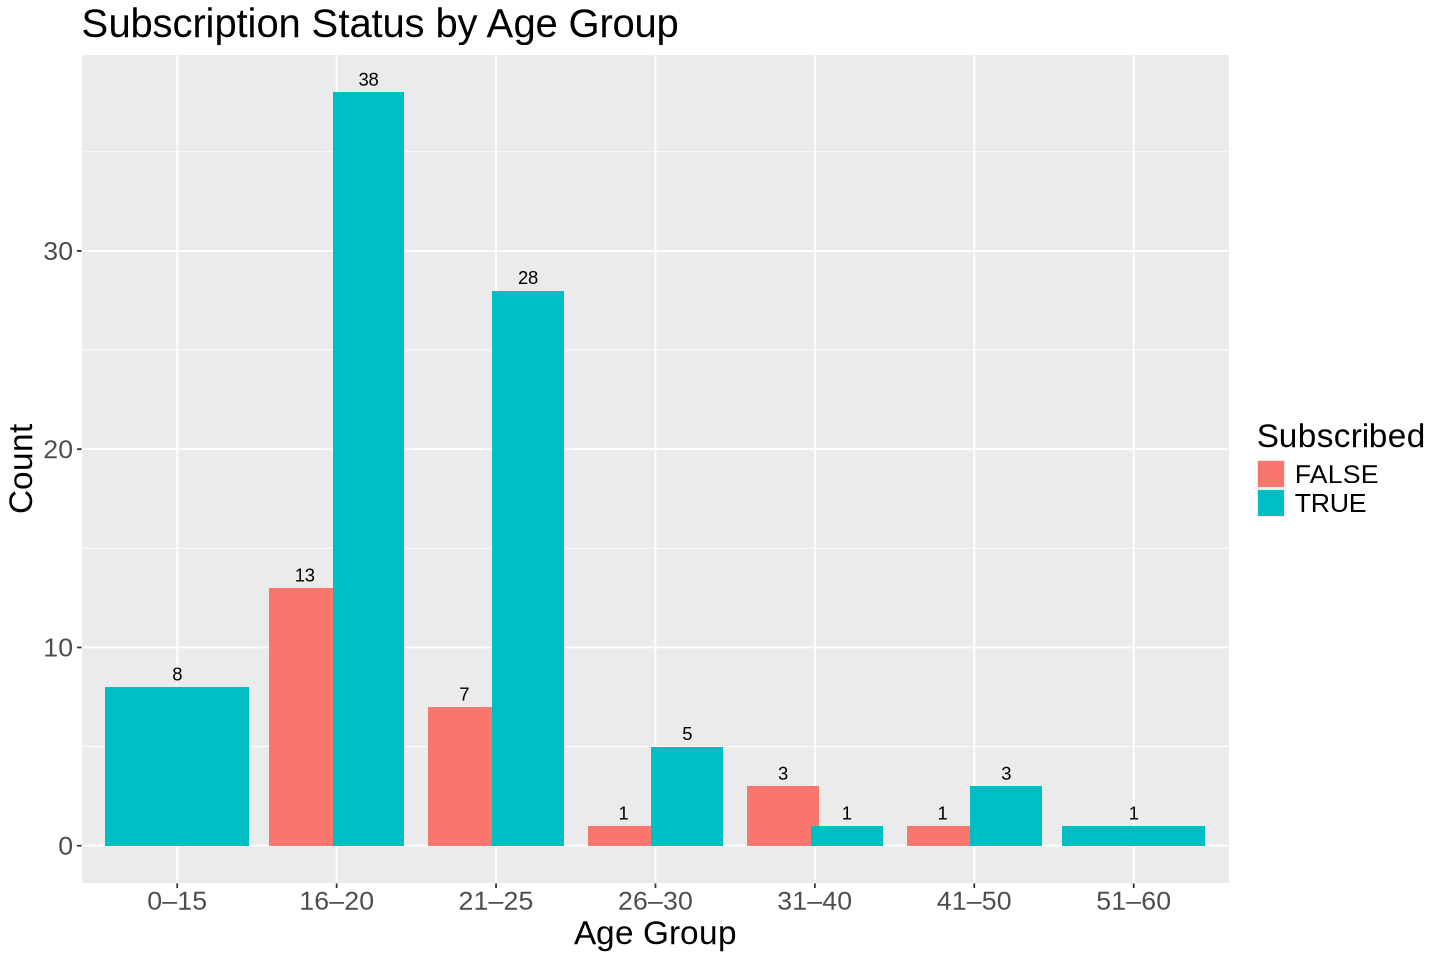

In [18]:
#Plot 2: Numeric Plot 1 - Age vs. Subscription Status

players_clean <- players_clean |>
    mutate(
    subscribe = as.factor(subscribe),
    experience = as.factor(experience),
    age_group = cut(
      Age,
      breaks = c(0, 15, 20, 25, 30, 40, 50, 60),
      labels = c("0–15","16–20","21–25","26–30","31–40","41–50","51–60")))

options(repr.plot.width = 12, repr.plot.height = 8)

num_plot1 <- players_clean |> 
    ggplot(aes(x = age_group, fill = subscribe)) +
    geom_bar(position = position_dodge(width = 0.8)) +
    geom_text(
    aes(label = after_stat(count)),
    stat = "count",
    position = position_dodge(width = 0.8),
    vjust = -0.5) +
    labs(title = "Subscription Status by Age Group", x = "Age Group", y = "Count", fill = "Subscribed") +
    theme(text = element_text(size = 20))

num_plot1


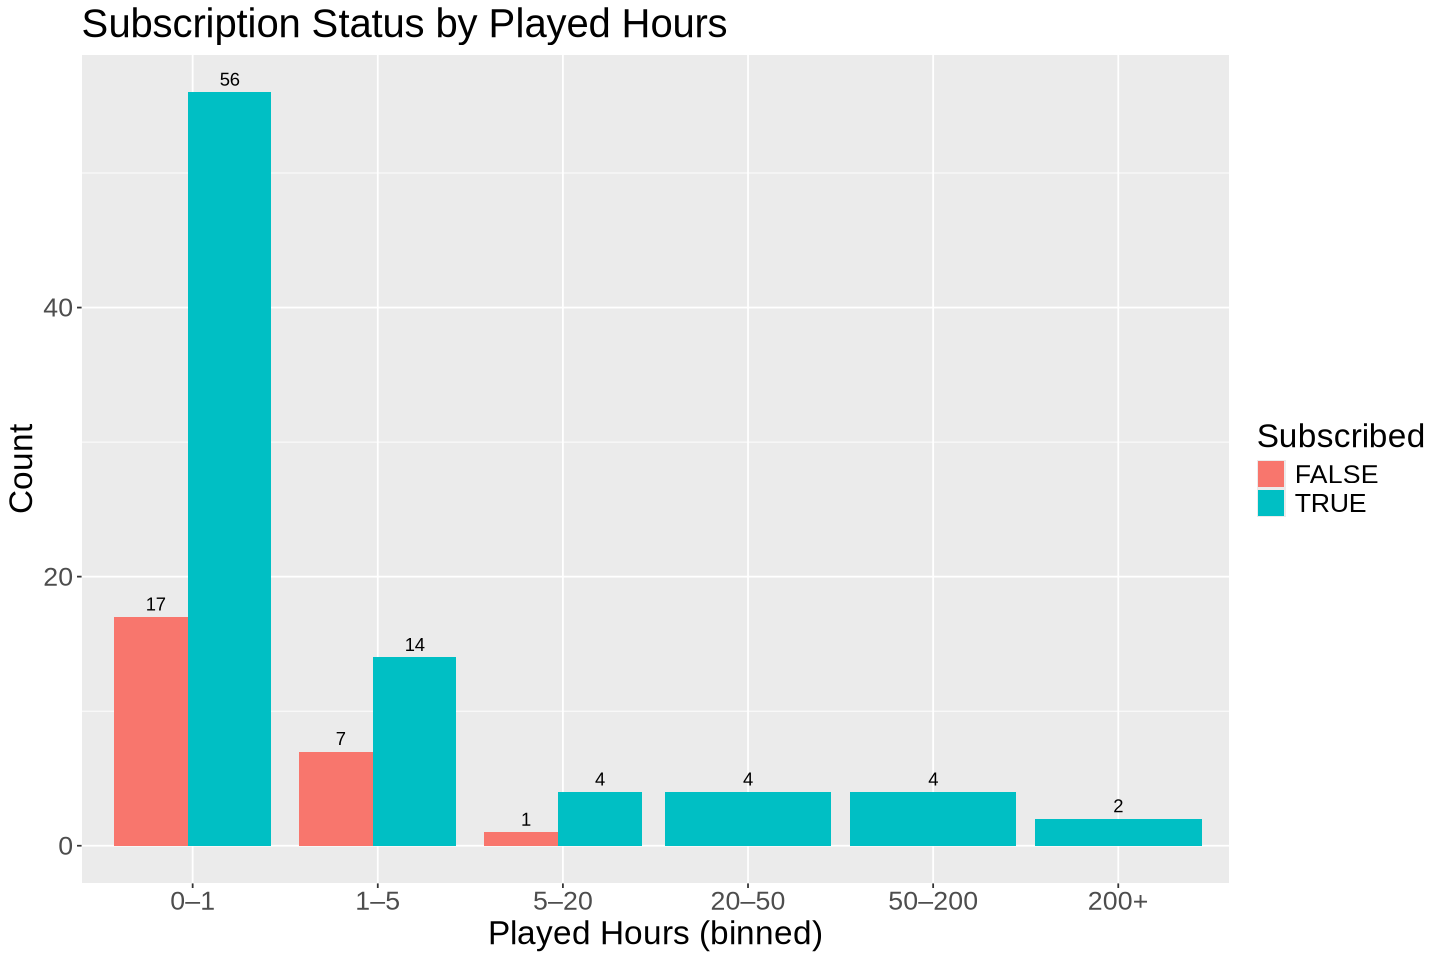

In [17]:
#Plot 3: Numeric Plot 2 - Played Hours vs. Subscription Status

players_clean <- players_clean |>
    mutate(hours_group = cut(
     played_hours,
     breaks = c(0,1,5,20,50,200,300),
     labels = c("0–1","1–5","5–20","20–50","50–200","200+"))) |>
    filter(!is.na(hours_group))  
 
num_plot2 <- players_clean |>
    ggplot(aes(hours_group, fill = subscribe)) +
    geom_bar(position = position_dodge(width = 0.8)) +
    geom_text(aes(label = after_stat(count)), stat = "count", position = position_dodge(width = 0.8), vjust = -0.5) +
    labs(title = "Subscription Status by Played Hours", x = "Played Hours (binned)", y = "Count", fill = "Subscribed") +
    theme(text = element_text(size = 20))

num_plot2


## **Visualization Insights:**

**Plot 1** 
- Veteran players subscribed the least (68%), wheareas regular players subscribed the most (81%)
- All other experience levels subscribed near similar levels (70-77%)
  
**Plot 2**
- The majority of subscribers are young (mostly concentratated in thr 16-25 age groups, with the majority being in the 16-20 group).
- In both groups, subscribers far outnumber non-subscribers.
- All individuals in the 0-15 age groups are subscribed.
- Users that are 30 years old or up are more rare and hvae lower subscription rates.

**Plot 3**
- The majority of players have very low played hours (73 users between 0-1 hour and 21 between 1-5 hours).
- In every bin, subscribers dramatically outnumber non-subscribers.
- Subscription is common very low-engagement players (0-1 bin) and all high-engagement players (20+ hours) are subscribed.  



## **Modelling**

In [21]:

set.seed(0)

players <- players |>
                    drop_na() |>
                    select(experience, subscribe, Age) |>
                    mutate(experience = as_factor(experience) |>
                                           fct_relevel("Beginner", "Amateur", "Regular", "Pro", "Veteran"),
                          subscribe = as_factor(subscribe),
                          Age = as.integer(Age)) 

players_resampled <- players |>
                        mutate(experience = as.integer(experience)) |>
                        rep_sample_n(size = 194, replace = TRUE, reps = 10)

subscribers_split <- players_resampled |>
                        initial_split(prop = 0.75)

subscribers_training <- training(subscribers_split)
subscribers_testing <- testing(subscribers_split)

subscribers_vfold <- vfold_cv(subscribers_training, v = 5, repeats = 5, strata = subscribe)

subscribers_k_values <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_classification_spec <- nearest_neighbor(weight = "rectangular", neighbors = tune()) |>
                            set_engine("kknn") |>
                            set_mode("classification")

subscribers_recipe <- recipe(subscribe ~ experience + played_hours + Age, data = subscribers_training) |>
                                step_smote(subscribe) |>
                                step_zv() |>
                                step_normalize(all_predictors())

subscribers_results <- workflow() |>
                        add_recipe(subscribers_recipe) |>
                        add_model(knn_classification_spec) |>
                        tune_grid(resamples = subscribers_vfold, grid = subscribers_k_values) |>
                        collect_metrics() |>
                        filter(.metric == "accuracy")

subscribers_results_plot <- subscribers_results |>
                                ggplot(aes(x = neighbors, y = mean)) +
                                    geom_point() +
                                    geom_line() +
                                    ggtitle("Accuracy vs Neighbors") +
                                    xlab("Neighbors") +
                                    ylab("Accuracy")
subscribers_results_plot

ERROR: [1m[33mError[39m in `recipe()`:[22m
[1m[22m[31m✖[39m Misspelled variable name or in-line functions detected.
[36mℹ[39m The following function/misspelling was found: `played_hours`.
[36mℹ[39m Use steps to do transformations instead.
[36mℹ[39m If your modeling engine uses special terms in formulas, pass that formula to
  workflows as a model formula (`?parsnip::model_formula()`).


## **Discussion**

A total of 196 players were recorded in this study on the UBC Minecraft research server led by Prof. Frank Wood in an open-access environment where player interactions are automatically logged. This study was conducted for a bit more than 2 months, from 2024-08-01 to 2024-11-30. Of the players who did subscribe to a game related newsletter, we found that subscription rates differed by experience, age, and played hours. In terms of experience level, players who were veterans at the game were found to have the lowest subscription rate (68%) and regular players were found to have the highest subscription rate (81%), all other experience levels subscribed near similar levels (70-77%). The median age of subscribed players was below 20, whereas the median age of unsubscribed players was above 20. The logged median played hours of subscribed players was higher than the logged median played hours for unsubscribed players, the latter also has a smaller spread of datapoints. The differences in subscription rates due to age, experience level, and played hours, show that these three variables can be used as predictors for the subscription status of players.

The results of the study were expected. Younger ages, regular experience levels, and higher played hours were linked to higher subscription rates. This could be because younger players have a tendence to spend more time in the game. Regular experience levels indicate that a player has played the game more than a beginner, but lacks the experience and knowledge of a pro or veteran that has already spent a lot of time on the game, so subsribing to a game-related newsletter would seem more attractive to players seeking to learn more or progress in the game. Younger players could be more interested in subscribing to a game related newsletter because they have more time than older players. Players with higher played hours could be more interested in subscribing to a game-related newsletter because they spend more time and are more attached to the game. To accomplish the goal of figuring out the influences that impact subscription rate to the game-related newsletter to target players to subscribe, more studies must be conducted to understand why player's age, experience level, and played hours impacts their subscription rate. 

Some limitations in this dataset are that most players in the study spent less than hour on Minecraft over the course of the study. There were also many outliers in the dataset. Having players with a wider range of playtime, or having a larger dataset, would provide better understanding to player subscription behaviour.


**References**